# This notebook analyses the output from JCrowdSimulator to understand more about the simulation environment


In [1]:
import os
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
import matplotlib.pyplot as plt
#import gp_emulator
#os.chdir("/Users/MinhKieu/Documents/Research/Emulator_ABM")  #Mac
print("checked")

checked


In [2]:
#Parameters: 
door_in=10  #coordinate of the entrance door
door_out = 100 #coordinate of the exit door

cell_size = 10 #the width of each cell, the height of the cell will aways be the heigth of the corridor

maxT = 300 #maximum time in s
#indexes of the raw file from JCrowdSimulator
TimeIndex = 0
AgentID = 1
XPosIndex = 2
YPosIndex = 3
TotalForceIndex=4
CurrentSpeedIndex=5
MaxSpeedIndex = 6
TimeThroughCorridorIndex= 7

HPP-cone-2
['HPP-cone-2ped-withspeed-1571825242950.csv', 'HPP-cone-2ped-withspeed-1571825447045.csv', 'HPP-cone-2ped-withspeed-1571825717753.csv', 'HPP-cone-2ped-withspeed-1571825059833.csv', 'HPP-cone-2ped-withspeed-1571824905377.csv']


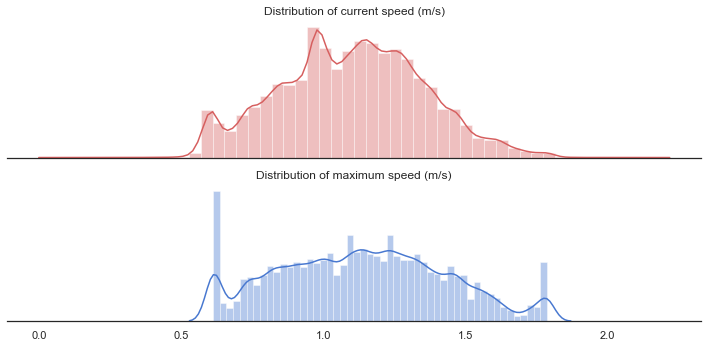

In [3]:
#Plot the distribution of actual speed and maximum speed
import seaborn as sns
os.chdir("/Users/MinhKieu/Documents/Research/Emulator_ABM/data/raw")

for i in [2]:
    
    sns.set(style="white", palette="muted", color_codes=True)
    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
    sns.despine(left=True)
    
    f = "HPP-cone-"+str(i)
    print(f)
    prefixed = [filename for filename in os.listdir('.') if filename.startswith(f)]
    print(prefixed)
    filename = prefixed[0]

    df = np.genfromtxt(filename, delimiter=',', skip_header=1)
    df=df[df[:,XPosIndex]>10]
    df=df[df[:,XPosIndex]<100]
    
    #plot the distribution of current speed
    # Plot a historgram and kernel density estimate
    ax1 =sns.distplot(df[:,CurrentSpeedIndex], color="r", ax=axes[0])
    ax1.set_title("Distribution of current speed (m/s)")

    ax2 = sns.distplot(df[:,MaxSpeedIndex], color="b", ax=axes[1])
    ax2.set_title("Distribution of maximum speed (m/s)")
    
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.savefig('Speed_distribution.pdf')
    

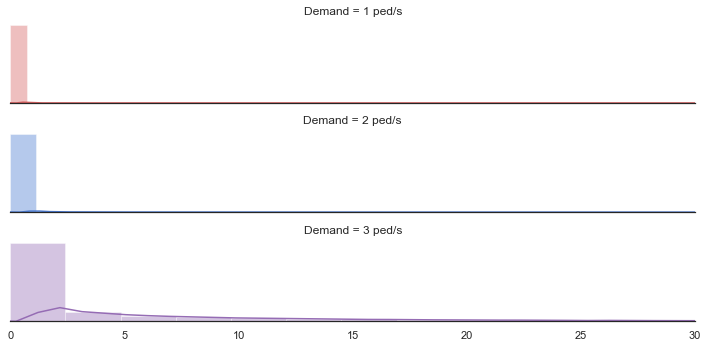

In [4]:
#Plot the distribution of social force
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(10, 5), sharex=True)
sns.despine(left=True)
axes = axes.ravel()

filename = 'HPP-cone-2ped-withspeed-1571824905377.csv'
df = np.genfromtxt(filename, delimiter=',', skip_header=1)
df=df[df[:,XPosIndex]>10]
df=df[df[:,XPosIndex]<100]
#plot the distribution of current speed
# Plot a historgram and kernel density estimate
sns.distplot(df[:,TotalForceIndex], color="r", ax=axes[0])
axes[0].set_title("Demand = 1 ped/s")
axes[0].set_xlim((0, 30))

filename = 'HPP-cone-4ped-withspeed-1571823495210.csv'
df = np.genfromtxt(filename, delimiter=',', skip_header=1)
df=df[df[:,XPosIndex]>10]
df=df[df[:,XPosIndex]<100]
#plot the distribution of current speed
# Plot a historgram and kernel density estimate
sns.distplot(df[:,TotalForceIndex], color="b", ax=axes[1])
axes[1].set_title("Demand = 2 ped/s")
axes[1].set_xlim((0, 30))

filename = 'HPP-cone-6ped-withspeed-1571821271529.csv'
df = np.genfromtxt(filename, delimiter=',', skip_header=1)
df=df[df[:,XPosIndex]>10]
df=df[df[:,XPosIndex]<100]
#plot the distribution of current speed
# Plot a historgram and kernel density estimate
sns.distplot(df[:,TotalForceIndex], color="m", ax=axes[2])
axes[2].set_title("Demand = 3 ped/s")
axes[2].set_xlim((0, 30))
    
#plot the distribution of current speed
#sns.distplot(df[:,TotalForceIndex], color="black", ax=axes[1, 0])

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.savefig('Social_Force_distribution.pdf')

    

In [11]:
## Plot density vs flow vs Social Force
tolerance = 0 #equals half of the width of the door
maxT = 1200 #maximum time in s
os.chdir("/Users/MinhKieu/Documents/Research/Emulator_ABM/data/raw")

stepT = 5 #each interval, in s
#Step 1: Load and process the data 
data = np.zeros(3*int((door_out-door_in)/cell_size)+1)
small_stepT = 1000
for i in [6]:
    #load the data
    f = "HPP-cone-"+str(i)
    #f = "test3"
    #print(f)
    prefixed = [filename for filename in os.listdir('.') if filename.startswith(f)]
    print(prefixed[0])
    
    for filename in prefixed:
       
        df = np.genfromtxt(filename, delimiter=',', skip_header=1)
        df=df[df[:,XPosIndex]>10]
        df=df[df[:,XPosIndex]<100]

        #now loop through time
        for t in range(0,maxT*1000,stepT*1000):
                df_interval = df[(df[:,0]>=t) & (df[:,0]<t+stepT*1000),:]
                timedata = [t/1000]

                for c in range(0, int((door_out-door_in)/cell_size)):
                #print(c)
                    b = 15-(c+1)*1.25
                    flow_in = np.size(np.unique(df_interval[(df_interval[:,XPosIndex]>=door_in+c*cell_size-tolerance)&(df_interval[:,XPosIndex]<door_in+(c+1)*cell_size+tolerance),AgentID]))/(stepT)
                    #timedata.append(t)
                    timedata.append(flow_in)
                    if flow_in ==0:
                        timedata.extend([0,0])        
                    else: 
                        #calculate the area of the trapezium 
                        #b = 15-(c+1)*1.25
                        a =  15 - (c+2)*1.25
                        area_c = (a+b)*cell_size
                        density_small_step=[]
                        #calculate the average density across the stepT
                        for small_step in range(t,t+stepT*1000,1000):
                            density_small_step.append(np.size(np.unique(df_interval[(df_interval[:,0]>=small_step) & (df_interval[:,0]<small_step+1000),AgentID])) / area_c)
                        timedata.append(np.mean(density_small_step))
                        mean_force = np.mean(df_interval[(df_interval[:,XPosIndex]>= door_in+c*cell_size-tolerance)& (df_interval[:,XPosIndex]< door_in+(c+1)*cell_size+tolerance),TotalForceIndex])
                        timedata.append(mean_force)
                #print(timedata)
                data = np.vstack((data,timedata))
    filename = 'Fundamental_data_' + str(i) +'.csv'
    np.savetxt(filename, data,fmt='%10.3f', delimiter=",")
    

HPP-cone-6ped-withspeed-1571822562738.csv


OSError: H not found.

In [4]:
print(data)

[[0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.200 0.011 ... 0.000 0.000 0.000]
 [5.000 3.200 0.046 ... 0.000 0.000 0.000]
 ...
 [285.000 9.600 1.092 ... 19.400 4.586 6.767]
 [290.000 9.200 1.353 ... 19.600 5.683 5.964]
 [295.000 11.000 1.377 ... 19.400 5.782 5.085]]


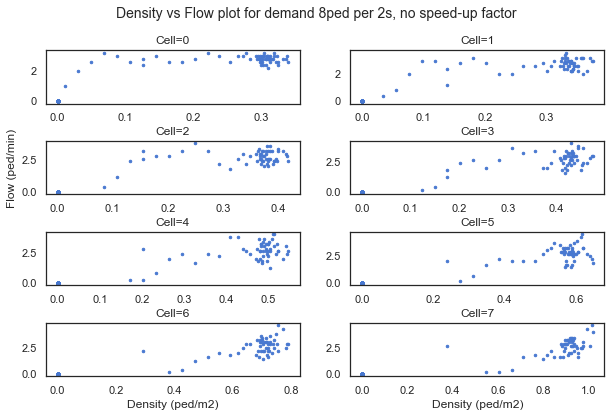

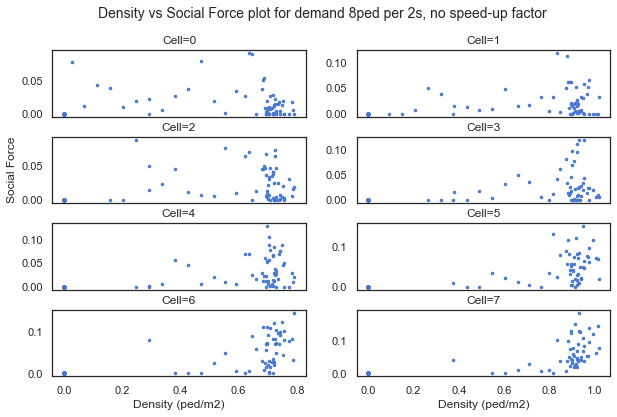

In [42]:
    #Step 2: plot fundamental diagram

    Flow = data[1:,range(1, np.size(data[1,:])-3,3)]
    Density = data[1:,range(2, np.size(data[1,:])-3,3)]
    Force = data[1:,range(3, np.size(data[1,:])-3,3)]
    Time = data[1:,0]
    #Step 2.1: Plot Density vs Flow scatterplot
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .7, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Density[:,c],Flow[:,c],'.',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        #axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(10,100)
        #if i==6:
        #    axs[c].set_ylim(0,50)
        if c>5:
            axs[c].set_xlabel('Density (ped/m2)')
            #axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Flow (ped/min)')
    
    #plotname= 'Density vs Flow plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Density vs Flow plot for demand 8ped per 2s, no speed-up factor'
    
    fig.suptitle(plotname, fontsize=14)
    filename = 'Fundamental_Density_Flow_' + str(i) +'ped_1m_tolerance.pdf'
    plt.savefig(filename)
    plt.show()
    #Step 2.2: Plot Density vs Social Force scatterplot
    
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Density[:,c],Force[:,c],'.',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(0, 0.2)
        #if i==6:
        #    axs[c].set_ylim(0,2)

        if c>5:
            axs[c].set_xlabel('Density (ped/m2)')
            axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Social Force')
    #plotname= 'Density vs Social Force plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Density vs Social Force plot for demand 8ped per 2s, no speed-up factor'
    fig.suptitle(plotname, fontsize=14)

    filename = 'Fundamental_Density_SocialForce_' + str(i) +'ped_1m_tolerance.pdf'
    plt.savefig(filename)
    plt.show()

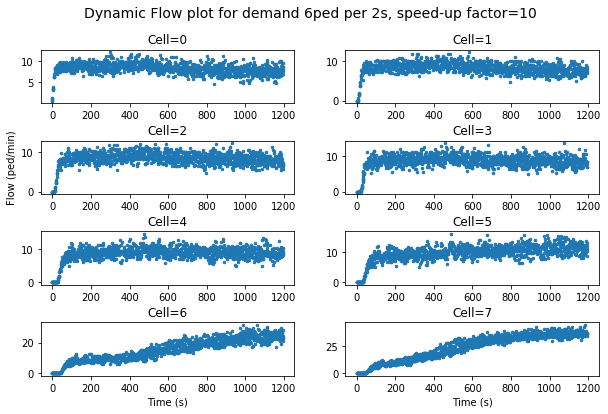

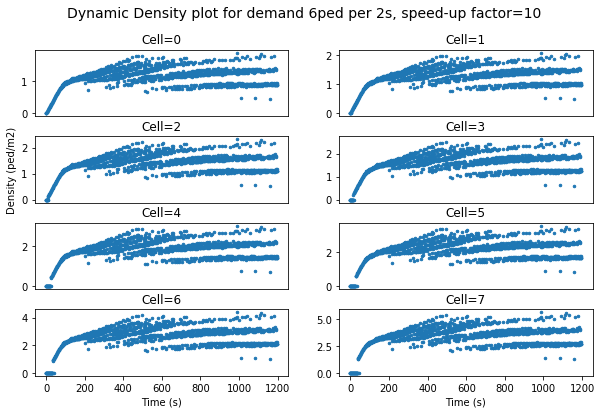

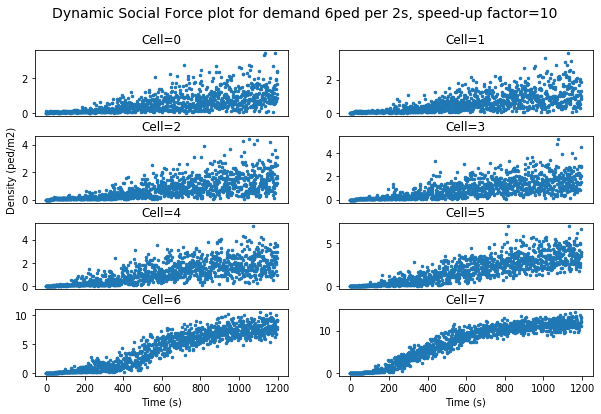

In [8]:
    #Step 2: plot fundamental diagram

    Flow = data[1:,range(1, np.size(data[1,:])-3,3)]
    Density = data[1:,range(2, np.size(data[1,:])-3,3)]
    Force = data[1:,range(3, np.size(data[1,:])-3,3)]
    Time = data[1:,0]
    #Step 2.1: Plot Density vs Flow scatterplot
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .7, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Flow[:,c],'.',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        #axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(10,100)
        #if i==6:
        #    axs[c].set_ylim(0,50)
        if c>5:
            axs[c].set_xlabel('Time (s)')
            #axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Flow (ped/min)')
    
    #plotname= 'Density vs Flow plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Flow plot for demand 6ped per 2s, speed-up factor=10'
    
    fig.suptitle(plotname, fontsize=14)
    filename = 'Dynamic_Flow_' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    #Step 2.2: Plot Density vs Social Force scatterplot
    
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Density[:,c],'.',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(0, 0.2)
        #if i==6:
        #    axs[c].set_ylim(0,2)

        if c>5:
            axs[c].set_xlabel('Time (s)')
            axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Density (ped/m2)')
    #plotname= 'Density vs Social Force plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Density plot for demand 6ped per 2s, speed-up factor=10'
    fig.suptitle(plotname, fontsize=14)

    filename = 'Dynamic_Density' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    
        #Step 2.3: Plot Dynamic Social Force scatterplot
    
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Force[:,c],'.',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(0, 0.2)
        #if i==6:
        #    axs[c].set_ylim(0,2)

        if c>5:
            axs[c].set_xlabel('Time (s)')
            axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Density (ped/m2)')
    #plotname= 'Density vs Social Force plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Social Force plot for demand 6ped per 2s, speed-up factor=10'
    fig.suptitle(plotname, fontsize=14)

    filename = 'Dynamic_Social_Force' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    

In [22]:
## Plot density vs flow vs Social Force
tolerance = 0 #equals half of the width of the door
maxT = 300 #maximum time in s
os.chdir("/Users/MinhKieu/Documents/Research/Emulator_ABM/data/raw")

stepT = 5 #each interval, in s
#Step 1: Load and process the data 
data = np.zeros(3*int((door_out-door_in)/cell_size)+1)
small_stepT = 1000
for i in [6]:
    #load the data
    #f = "HPP-cone-"+str(i)
    f = "test5"
    #print(f)
    prefixed = [filename for filename in os.listdir('.') if filename.startswith(f)]
    print(prefixed[0])
           
    df = np.genfromtxt(prefixed[0], delimiter=',', skip_header=1)
    df=df[df[:,XPosIndex]>10]
    df=df[df[:,XPosIndex]<100]

    #now loop through time
    for t in range(0,maxT*1000,stepT*1000):
            df_interval = df[(df[:,0]>=t) & (df[:,0]<t+stepT*1000),:]
            timedata = [t/1000]

            for c in range(0, int((door_out-door_in)/cell_size)):
            #print(c)
                b = 15-(c+1)*1.25
                flow_in = np.size(np.unique(df_interval[(df_interval[:,XPosIndex]>=door_in+c*cell_size-tolerance)&(df_interval[:,XPosIndex]<door_in+(c+1)*cell_size+tolerance),AgentID]))/(stepT)
                #timedata.append(t)
                timedata.append(flow_in)
                if flow_in ==0:
                    timedata.extend([0,0])        
                else: 
                    #calculate the area of the trapezium 
                    #b = 15-(c+1)*1.25
                    a =  15 - (c+2)*1.25
                    area_c = (a+b)*cell_size
                    density_small_step=[]
                    #calculate the average density across the stepT
                    for small_step in range(t,t+stepT*1000,1000):
                        density_small_step.append(np.size(np.unique(df_interval[(df_interval[:,0]>=small_step) & (df_interval[:,0]<small_step+1000),AgentID])) / area_c)
                    timedata.append(np.mean(density_small_step))
                    mean_force = np.mean(df_interval[(df_interval[:,XPosIndex]>= door_in+c*cell_size-tolerance)& (df_interval[:,XPosIndex]< door_in+(c+1)*cell_size+tolerance),TotalForceIndex])
                    timedata.append(mean_force)
            #print(timedata)
            data = np.vstack((data,timedata))
filename = 'Fundamental_data_' + str(i) +'_1file.csv'
np.savetxt(filename, data,fmt='%10.3f', delimiter=",")
    

test5.csv


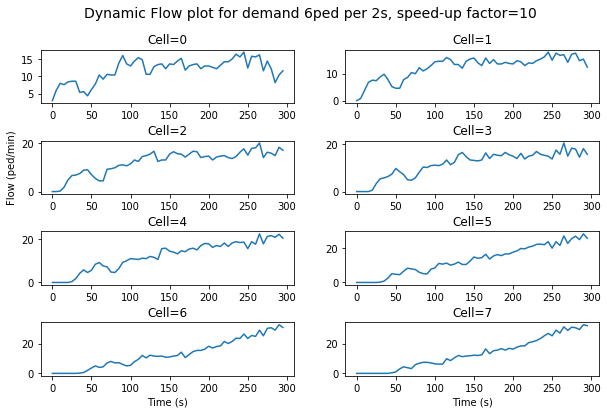

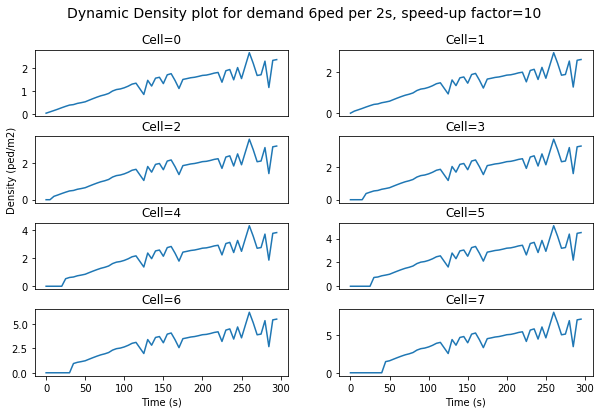

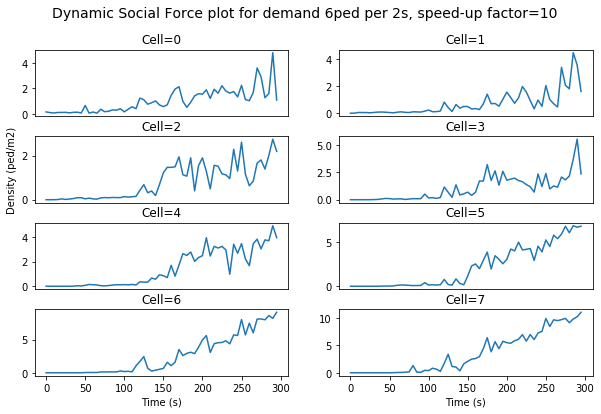

In [23]:
    #Step 2: plot fundamental diagram

    Flow = data[1:,range(1, np.size(data[1,:])-3,3)]
    Density = data[1:,range(2, np.size(data[1,:])-3,3)]
    Force = data[1:,range(3, np.size(data[1,:])-3,3)]
    Time = data[1:,0]
    #Step 2.1: Plot Density vs Flow scatterplot
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .7, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Flow[:,c],'-',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        #axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(10,100)
        #if i==6:
        #    axs[c].set_ylim(0,50)
        if c>5:
            axs[c].set_xlabel('Time (s)')
            #axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Flow (ped/min)')
    
    #plotname= 'Density vs Flow plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Flow plot for demand 6ped per 2s, speed-up factor=10'
    
    fig.suptitle(plotname, fontsize=14)
    filename = 'Dynamic_Flow_' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    #Step 2.2: Plot Density vs Social Force scatterplot
    
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Density[:,c],'-',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(0, 0.2)
        #if i==6:
        #    axs[c].set_ylim(0,2)

        if c>5:
            axs[c].set_xlabel('Time (s)')
            axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Density (ped/m2)')
    #plotname= 'Density vs Social Force plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Density plot for demand 6ped per 2s, speed-up factor=10'
    fig.suptitle(plotname, fontsize=14)

    filename = 'Dynamic_Density' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    
        #Step 2.3: Plot Dynamic Social Force scatterplot
    
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Force[:,c],'-',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(0, 0.2)
        #if i==6:
        #    axs[c].set_ylim(0,2)

        if c>5:
            axs[c].set_xlabel('Time (s)')
            axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Density (ped/m2)')
    #plotname= 'Density vs Social Force plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Social Force plot for demand 6ped per 2s, speed-up factor=10'
    fig.suptitle(plotname, fontsize=14)

    filename = 'Dynamic_Social_Force' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    

In [24]:
## Plot density vs flow vs Social Force
tolerance = 0 #equals half of the width of the door
maxT = 300 #maximum time in s
os.chdir("/Users/MinhKieu/Documents/Research/Emulator_ABM/data/raw")

stepT = 5 #each interval, in s
#Step 1: Load and process the data 
data = np.zeros(3*int((door_out-door_in)/cell_size)+1)
small_stepT = 1000
for i in [6]:
    #load the data
    #f = "HPP-cone-"+str(i)
    f = "HPP-3ped"
    #print(f)
    prefixed = [filename for filename in os.listdir('.') if filename.startswith(f)]
    print(prefixed[0])
           
    df = np.genfromtxt(prefixed[0], delimiter=',', skip_header=1)
    df=df[df[:,XPosIndex]>10]
    df=df[df[:,XPosIndex]<100]

    #now loop through time
    for t in range(0,maxT*1000,stepT*1000):
            df_interval = df[(df[:,0]>=t) & (df[:,0]<t+stepT*1000),:]
            timedata = [t/1000]

            for c in range(0, int((door_out-door_in)/cell_size)):
            #print(c)
                b = 15-(c+1)*1.25
                flow_in = np.size(np.unique(df_interval[(df_interval[:,XPosIndex]>=door_in+c*cell_size-tolerance)&(df_interval[:,XPosIndex]<door_in+(c+1)*cell_size+tolerance),AgentID]))/(stepT)
                #timedata.append(t)
                timedata.append(flow_in)
                if flow_in ==0:
                    timedata.extend([0,0])        
                else: 
                    #calculate the area of the trapezium 
                    #b = 15-(c+1)*1.25
                    a =  15 - (c+2)*1.25
                    area_c = (a+b)*cell_size
                    density_small_step=[]
                    #calculate the average density across the stepT
                    for small_step in range(t,t+stepT*1000,1000):
                        density_small_step.append(np.size(np.unique(df_interval[(df_interval[:,0]>=small_step) & (df_interval[:,0]<small_step+1000),AgentID])) / area_c)
                    timedata.append(np.mean(density_small_step))
                    mean_force = np.mean(df_interval[(df_interval[:,XPosIndex]>= door_in+c*cell_size-tolerance)& (df_interval[:,XPosIndex]< door_in+(c+1)*cell_size+tolerance),TotalForceIndex])
                    timedata.append(mean_force)
            #print(timedata)
            data = np.vstack((data,timedata))
filename = 'Fundamental_data_' + str(i) +'_1file.csv'
np.savetxt(filename, data,fmt='%10.3f', delimiter=",")
    

HPP-3ped.csv


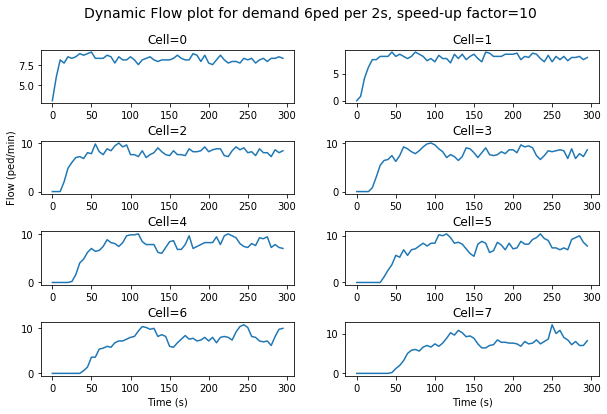

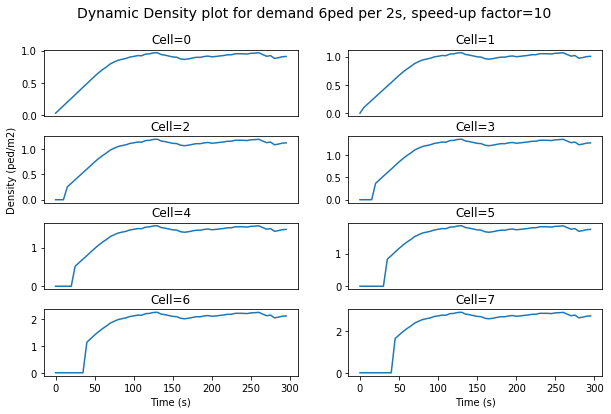

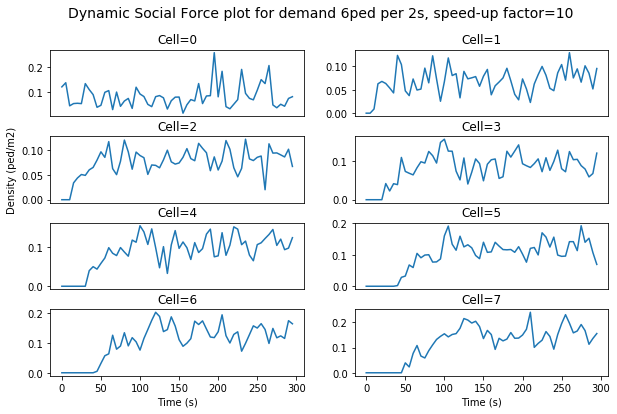

In [25]:
    #Step 2: plot fundamental diagram

    Flow = data[1:,range(1, np.size(data[1,:])-3,3)]
    Density = data[1:,range(2, np.size(data[1,:])-3,3)]
    Force = data[1:,range(3, np.size(data[1,:])-3,3)]
    Time = data[1:,0]
    #Step 2.1: Plot Density vs Flow scatterplot
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .7, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Flow[:,c],'-',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        #axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(10,100)
        #if i==6:
        #    axs[c].set_ylim(0,50)
        if c>5:
            axs[c].set_xlabel('Time (s)')
            #axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Flow (ped/min)')
    
    #plotname= 'Density vs Flow plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Flow plot for demand 6ped per 2s, speed-up factor=10'
    
    fig.suptitle(plotname, fontsize=14)
    filename = 'Dynamic_Flow_' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    #Step 2.2: Plot Density vs Social Force scatterplot
    
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Density[:,c],'-',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(0, 0.2)
        #if i==6:
        #    axs[c].set_ylim(0,2)

        if c>5:
            axs[c].set_xlabel('Time (s)')
            axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Density (ped/m2)')
    #plotname= 'Density vs Social Force plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Density plot for demand 6ped per 2s, speed-up factor=10'
    fig.suptitle(plotname, fontsize=14)

    filename = 'Dynamic_Density' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    
        #Step 2.3: Plot Dynamic Social Force scatterplot
    
    fig, axs = plt.subplots(4,2, figsize=(10, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=.2)

    axs = axs.ravel()

    for c in range(0,8):
        axs[c].plot(Time,Force[:,c],'-',markersize=5)
        axs[c].set_title('Cell='+ str(c))
        axs[c].get_xaxis().set_visible(False)
        #axs[c].set_ylim(0, 0.2)
        #if i==6:
        #    axs[c].set_ylim(0,2)

        if c>5:
            axs[c].set_xlabel('Time (s)')
            axs[c].get_xaxis().set_visible(True)
        if c==2:
            axs[c].set_ylabel('Density (ped/m2)')
    #plotname= 'Density vs Social Force plot for demand =' + str(i/2) + ' ped/s'
    plotname= 'Dynamic Social Force plot for demand 6ped per 2s, speed-up factor=10'
    fig.suptitle(plotname, fontsize=14)

    filename = 'Dynamic_Social_Force' + str(i) +'ped.pdf'
    plt.savefig(filename)
    plt.show()
    